# Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).


In [1]:
import numpy as np
import pandas as pd

#### Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?


In [3]:
df = pd.read_csv('fraud_data.csv')
bincount = np.bincount(df.Class)
print(len(df))
bincount

21693


array([21337,   356])

In [3]:
    
df = pd.read_csv('fraud_data.csv')
bincount = np.bincount(df.Class)
bincount[1]/len(df)


0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

####  What is the accuracy of this classifier? What is the recall?


In [5]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score
    
dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
predicted = dummy_clf.predict(X_test)

accuracy_score(y_test, predicted), recall_score(y_test, predicted)

(0.9852507374631269, 0.0)

###  SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?


In [6]:


from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
accuracy_score(y_test, predicted), recall_score(y_test, predicted), precision_score(y_test, predicted)

(0.9907817109144543, 0.375, 1.0)

what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

svm = SVC(gamma=1e-07,C=1e9).fit(X_train, y_train)
prediction = svm.decision_function(X_test) > -220
confusion = confusion_matrix(y_test, prediction)
confusion

array([[5320,   24],
       [  14,   66]], dtype=int64)

### 

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?


<IPython.core.display.Javascript object>


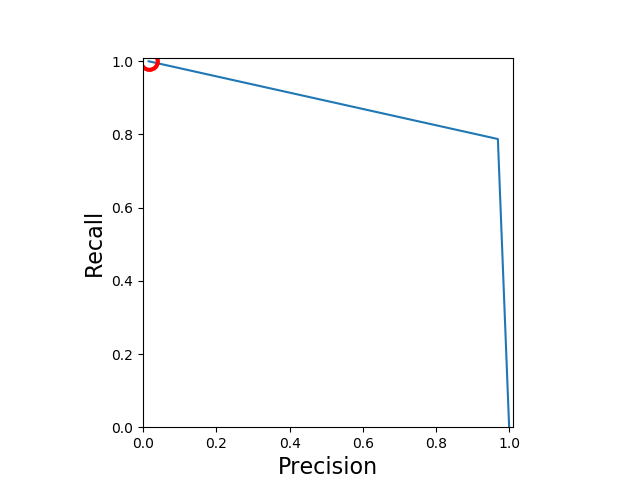

C:\Users\admin\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


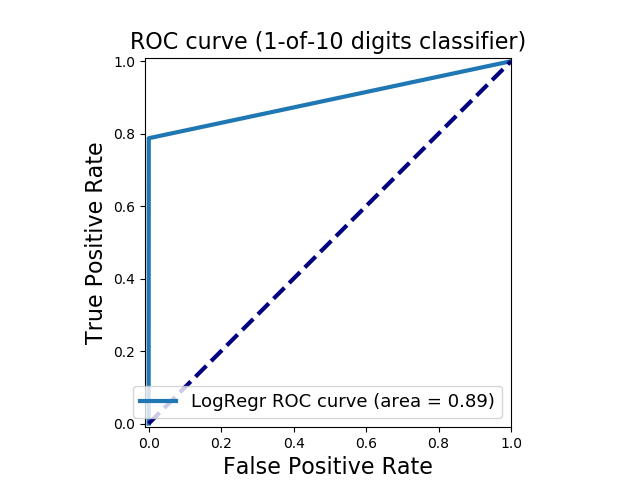

C:\Users\admin\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### 

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.


In [10]:
 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
grid_clf_rec = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
grid_clf_rec.fit(X_train, y_train)
np.array(grid_clf_rec.cv_results_['mean_test_score']).reshape(5,2)

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


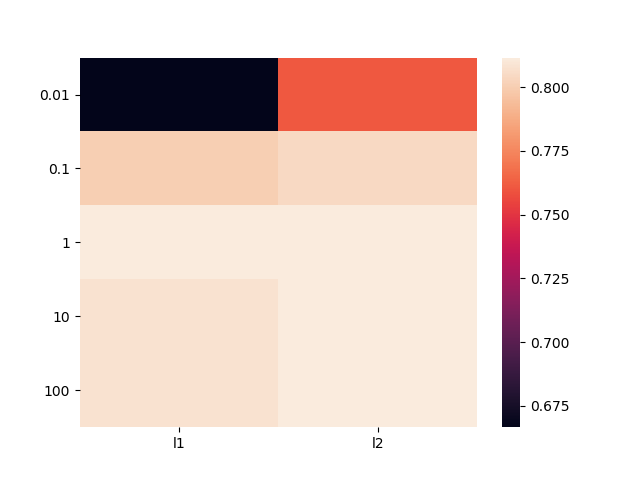

In [12]:
scores = np.array(grid_clf_rec.cv_results_['mean_test_score']).reshape(5,2)
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);
